Shape of image:  (640, 960, 3)


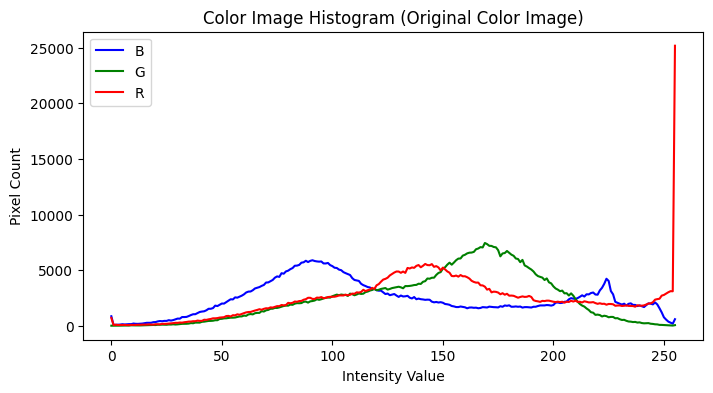

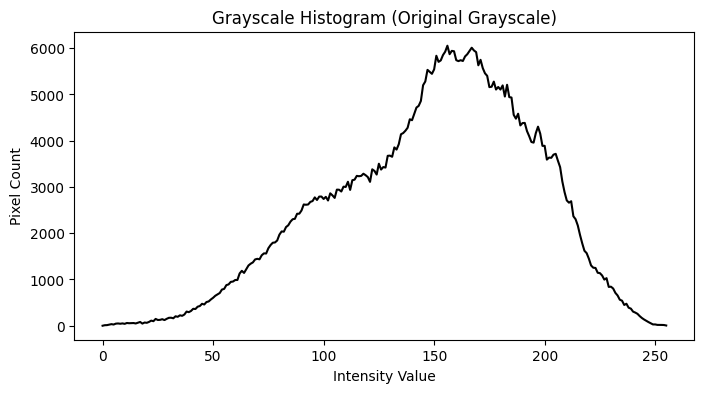

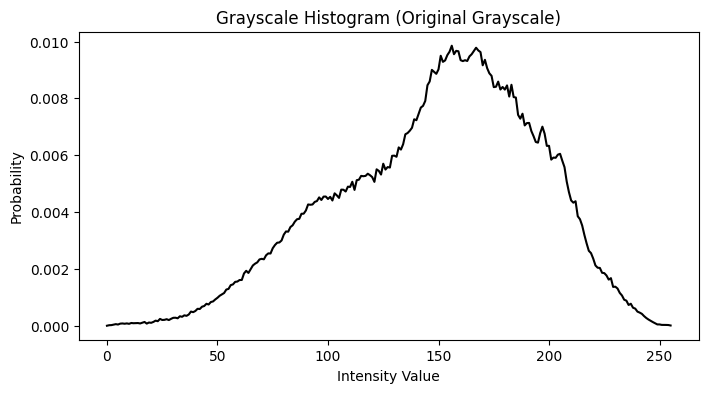

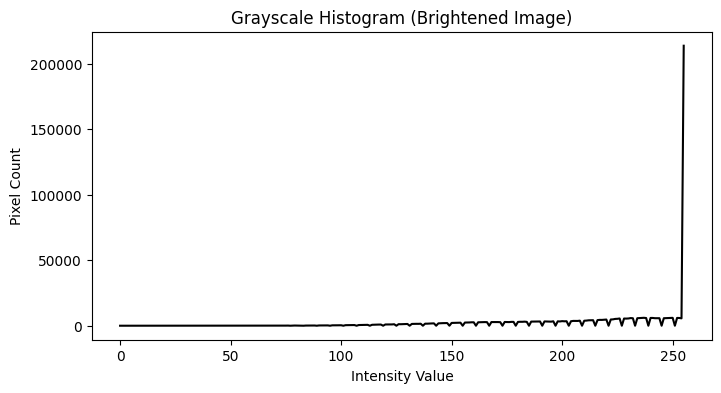

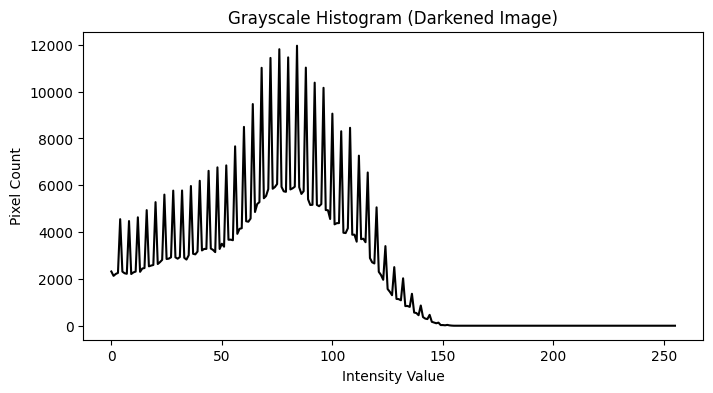

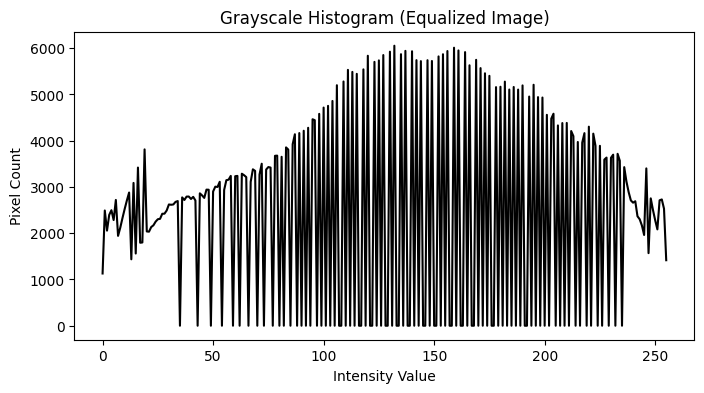

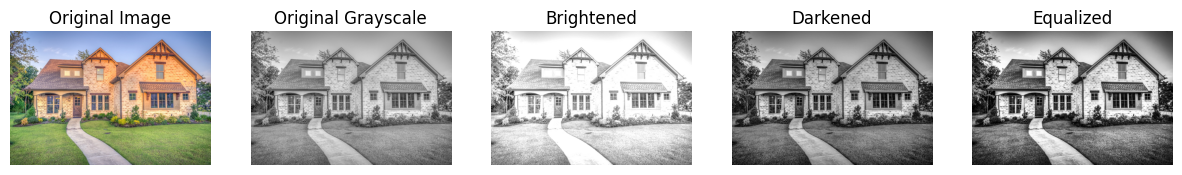

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def show_images(images, titles):
    plt.figure(figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
        plt.title(title)
        plt.axis('off')
    plt.show()

def plot_histogram(image, title, method="frequency"):
    plt.figure(figsize=(8, 4))
    if len(image.shape) == 3:
        colors = ('b', 'g', 'r')
        for i, col in enumerate(colors):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            if method == "probability":
                hist /= hist.sum()
            sns.lineplot(x=np.arange(256), y=hist.flatten(), color=col, label=col.upper())
        plt.title(f"Color Image Histogram ({title})")
    else:
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        if method == "probability":
            hist /= hist.sum()
        sns.lineplot(x=np.arange(256), y=hist.flatten(), color="black")
        plt.title(f"Grayscale Histogram ({title})")
    
    plt.xlabel("Intensity Value")
    plt.ylabel("Pixel Count" if method == "frequency" else "Probability")
    plt.show()

image = cv2.imread('house.jpg')
print("Shape of image: ",image.shape)
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plot_histogram(image, "Original Color Image", method="frequency")
plot_histogram(gray_image, "Original Grayscale", method="frequency")
plot_histogram(gray_image, "Original Grayscale", method="probability")


bright_image = cv2.convertScaleAbs(gray_image, alpha=1.2, beta=50)  # Bright
dark_image = cv2.convertScaleAbs(gray_image, alpha=0.8, beta=-50)  # Dark
plot_histogram(bright_image, "Brightened Image", method="frequency")
plot_histogram(dark_image, "Darkened Image", method="frequency")

equalized_image = cv2.equalizeHist(gray_image)
plot_histogram(equalized_image, "Equalized Image", method="frequency")

show_images(
    [image_rgb, gray_image, bright_image, dark_image, equalized_image],
    ["Original Image", "Original Grayscale", "Brightened", "Darkened", "Equalized"]
)


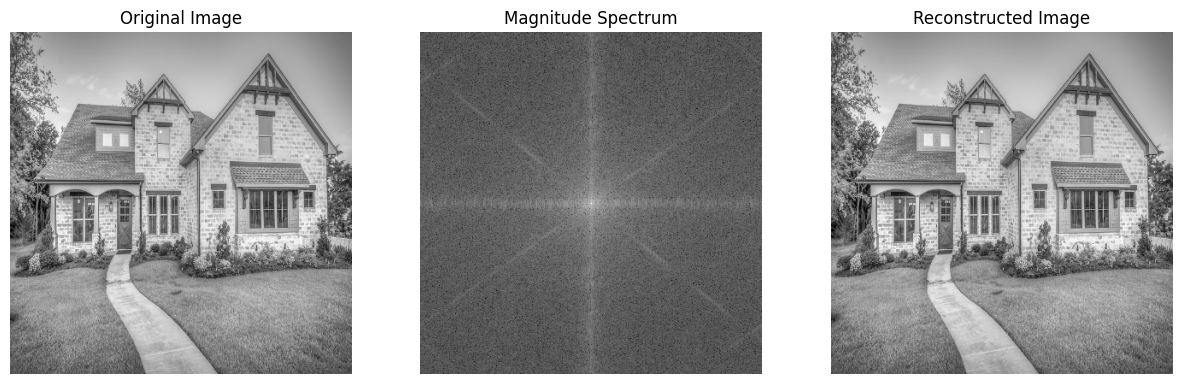

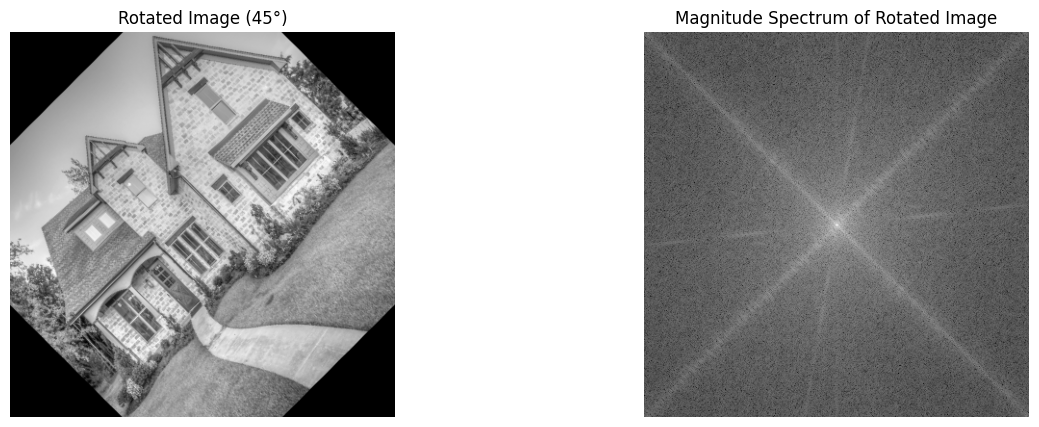

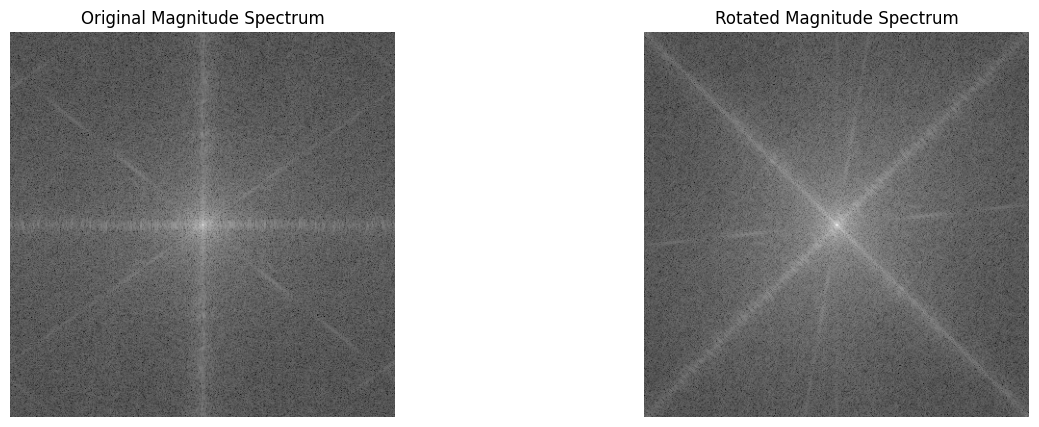

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_images(images, titles, cmap="gray"):
    plt.figure(figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, cmap=cmap)
        plt.title(title)
        plt.axis("off")
    plt.show()


image = cv2.imread("house.jpg", cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (400, 400))

# Compute the FFT and magnitude spectrum
def compute_fft(img):
    dft = np.fft.fft2(img)
    dft_shift = np.fft.fftshift(dft)  # Center the FFT
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)
    return dft, dft_shift, magnitude_spectrum

dft, dft_shift, magnitude_spectrum = compute_fft(image)

# Perform Inverse FFT
def compute_ifft(dft_shift):
    idft_shift = np.fft.ifftshift(dft_shift)  # Shift back
    img_reconstructed = np.fft.ifft2(idft_shift).real  # Take real part
    return img_reconstructed

reconstructed_image = compute_ifft(dft_shift)

show_images(
    [image, magnitude_spectrum, reconstructed_image],
    ["Original Image", "Magnitude Spectrum", "Reconstructed Image"]
)

# Rotate image by 45 degrees
def rotate_image(img, angle):
    h, w = img.shape
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv2.warpAffine(img, M, (w, h))
    return rotated_img

rotated_image = rotate_image(image, 45)
_, _, rotated_magnitude_spectrum = compute_fft(rotated_image)


show_images(
    [rotated_image, rotated_magnitude_spectrum],
    ["Rotated Image (45°)", "Magnitude Spectrum of Rotated Image"]
)

show_images(
    [magnitude_spectrum, rotated_magnitude_spectrum],
    ["Original Magnitude Spectrum", "Rotated Magnitude Spectrum"]
)
